In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
# 가상의 분류 데이터를 생성해 보자.
X, y = make_classification(n_samples = 100, n_features = 1, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)

- n_samples : data의 수, 기본값은 100  
- n_features : feature의 수, 기본값은 20  
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2  
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2  
- n_classes : 종속변수의 class 수, 기본값은 2  (이진 데이터)
- n_clusters_per_class : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다., 주의 사항으로 n_classes * n_clusters_per_class는 2 ** n_informative보다 작거나 같게 설정해야 한다. 
- random_state : 난수 발생, 난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.

In [ ]:
X.shape

(100, 1)

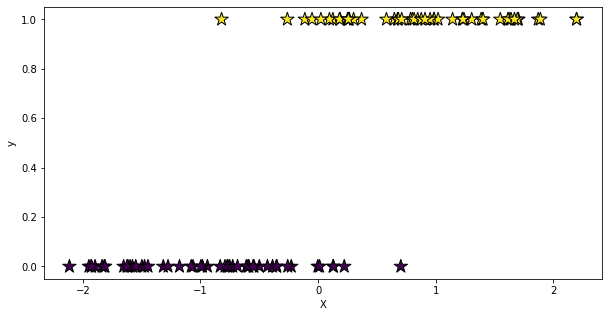

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(X, y, marker = '*', c = y, edgecolors = 'k', s = 200)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

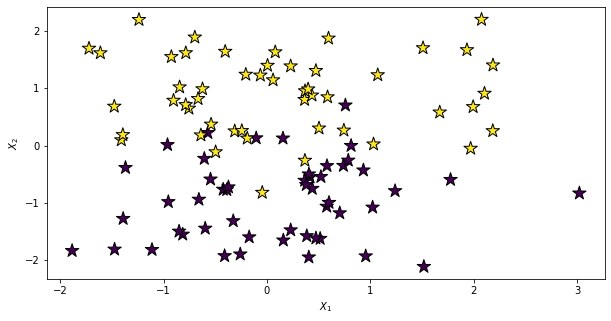

In [ ]:
cm = [ plt.cm.Blues, plt.cm.Reds]
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.show()

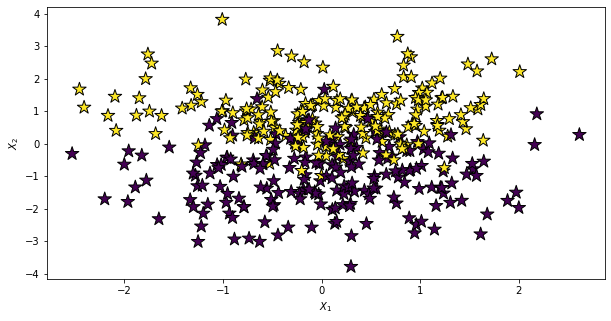

In [ ]:
cm = [ plt.cm.Blues, plt.cm.Reds]
X, y = make_classification(n_samples = 400, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.show()

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.predict(X)[:10], y[:10]

(array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]), array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
accuracy_score(y, log_reg.predict(X))

0.8625

In [ ]:
log_reg.score(X, y)

0.8625

In [ ]:
precision_score(y, log_reg.predict(X))

0.8571428571428571

In [ ]:
recall_score(y, log_reg.predict(X))

0.87

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, log_reg.predict(X))

array([[171,  29],
       [ 26, 174]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       200
           1       0.86      0.87      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
from sklearn.metrics import f1_score
f1_score(y, log_reg.predict(X))

0.8635235732009925

## log_regression

In [ ]:
log_reg.coef_, log_reg.intercept_

(array([[0.01827322, 2.55005068]]), array([-0.05282522]))

In [ ]:
log_reg.decision_function(X)

array([ 1.73052131, -0.1609783 ,  3.20627859, -3.42667379, -1.74435593,
        1.21884554,  9.66387234,  2.47914877,  3.31519375, -7.03626755,
        1.13437539,  5.93150147, -3.54081844, -0.38340836,  1.69183402,
       -5.52256071, -3.7040999 ,  1.60696   , -1.22939601,  0.49525708,
        3.32990738, -5.2106496 ,  2.23443568, -2.07857475,  2.04671166,
       -6.37503309, -6.60461987,  1.58354203, -0.13077697, -0.17569119,
        2.41933595,  0.61522447,  2.69342814,  4.20262411,  1.22534049,
       -4.63912624,  0.49795014, -1.93931032, -4.42524727,  1.69816835,
        2.121387  , -3.56294949, -1.48328315,  1.77619916,  2.44731671,
        0.55358218, -0.34223117,  4.89526507,  0.17512583,  3.06668092,
        5.66737303, -1.61324681, -7.47835888, -3.9886006 ,  0.9885147 ,
       -1.05492497, -4.84851444,  0.9424552 , -6.60736946,  0.12271795,
        3.6173645 ,  7.22242368, -4.67706302,  2.92955816,  0.69971247,
       -3.82864233,  0.70463532, -1.02764169,  2.90611066,  6.10

In [ ]:
log_reg.predict(X)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [ ]:
log_reg.predict_proba(X)[:10]

array([[1.50520910e-01, 8.49479090e-01],
       [5.40157891e-01, 4.59842109e-01],
       [3.89301307e-02, 9.61069869e-01],
       [9.68527837e-01, 3.14721627e-02],
       [8.51239505e-01, 1.48760495e-01],
       [2.28139679e-01, 7.71860321e-01],
       [6.35339672e-05, 9.99936466e-01],
       [7.73329174e-02, 9.22667083e-01],
       [3.50536165e-02, 9.64946383e-01],
       [9.99121370e-01, 8.78630100e-04]])

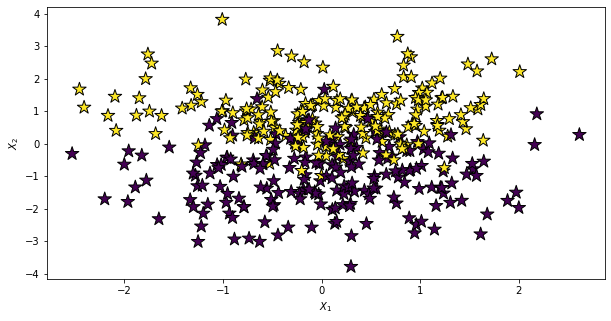

In [ ]:
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.show()

In [ ]:
y_pred_10 = log_reg.predict_proba(X)[:10]
np.argmax(y_pred_10, axis=1)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
log_reg.predict(X)[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
# WX = 0
# W1X1 + W2X2 + W0 = 0

# X2 = -(W1X1 +W0) / W2


In [ ]:
log_reg.coef_.flatten()[0]

0.0182732231514814

In [ ]:
X_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
W = log_reg.coef_.flatten()
W1 = W[0]
W2 = W[1]
X_2 = -(W1*X_1 + log_reg.intercept_) / W2
X_2
# log_reg.decision_function(X)

array([0.03883371, 0.03846145, 0.03808919, 0.03771693, 0.03734467,
       0.03697241, 0.03660015, 0.03622789, 0.03585563, 0.03548337,
       0.03511111, 0.03473885, 0.0343666 , 0.03399434, 0.03362208,
       0.03324982, 0.03287756, 0.0325053 , 0.03213304, 0.03176078,
       0.03138852, 0.03101626, 0.030644  , 0.03027174, 0.02989948,
       0.02952722, 0.02915496, 0.0287827 , 0.02841044, 0.02803818,
       0.02766592, 0.02729366, 0.0269214 , 0.02654914, 0.02617688,
       0.02580462, 0.02543236, 0.0250601 , 0.02468784, 0.02431558,
       0.02394332, 0.02357106, 0.0231988 , 0.02282654, 0.02245428,
       0.02208202, 0.02170976, 0.0213375 , 0.02096524, 0.02059298,
       0.02022072, 0.01984846, 0.01947621, 0.01910395, 0.01873169,
       0.01835943, 0.01798717, 0.01761491, 0.01724265, 0.01687039,
       0.01649813, 0.01612587, 0.01575361, 0.01538135, 0.01500909,
       0.01463683, 0.01426457, 0.01389231, 0.01352005, 0.01314779,
       0.01277553, 0.01240327, 0.01203101, 0.01165875, 0.01128

Decision Boundary그리기


In [ ]:
def plot_decitsion_regios

NameError: ignored

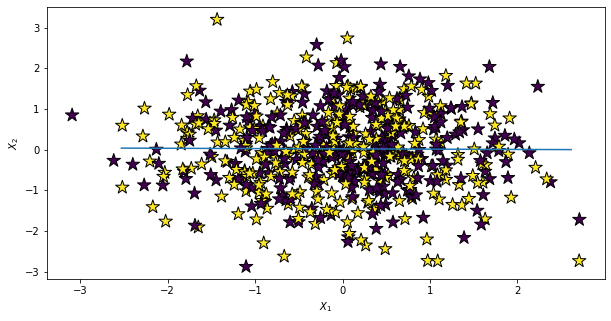

In [ ]:
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.plot(X_1, X_2)
mglearn.plots.plot_2d_separator(log_ref, X, fill=True, eps=0.5, ax=ax, alpha=.4)
plt.show()

## C 값 조절


In [ ]:
# X에 대해서 LOGISTIC REGRESSION C값(규제)을 바꿔가면서 한 번 작성 해주세요.
# 각 결과에서 Precision, Recall, f1_score, accuracy를 출력해주세요.
# 규제는 l1규제 한 번, l2규제로도 한번 해보세요.

# l1 규제 에러=> solver: liblinear => lbfgs(L-BFGS) 
# l1 규제시 liblinear 사용해야 함. solver='liblinear'로

# liblinear: 최적화 알고리즘 이름(모듈 이름.)
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 600, n_features=50, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)

X_train, X_test, y_train, y_test = train_test_split(X, y)


# C값 조절
for C in [0.01, 0.1, 1, 10, 100]:
    print("C Value:{}".format(C))
    lin_reg = LogisticRegression(penalty='l2', C=C).fit(X_train, y_train)
    print("train 정확도:" , accuracy_score(y_train, lin_reg.predict(X_train)))
    print("test 정확도", accuracy_score(y_test, lin_reg.predict(X_test)))

    # print("Precisson(정밀도):" , accuracy_score(y, lin_reg.predict(X)))
    # print("Recall(재현율):" , recall_score(y, lin_reg.predict(X)))
    # print("F1(Score): ", recall_score(y, lin_reg.predict(X)))
    print('-'*10)

C Value:0.01
train 정확도: 0.9911111111111112
test 정확도 0.98
----------
C Value:0.1
train 정확도: 0.9911111111111112
test 정확도 0.9866666666666667
----------
C Value:1
train 정확도: 0.9911111111111112
test 정확도 0.9866666666666667
----------
C Value:10
train 정확도: 1.0
test 정확도 0.9666666666666667
----------
C Value:100
train 정확도: 1.0
test 정확도 0.9533333333333334
----------


# 당뇨병 데이터

In [ ]:
from sklearn.datasets import load_diabetes

In [107]:
diabete = load_diabetes()

In [109]:
df = pd.DataFrame(diabete.data, columns=diabete.feature_names)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [112]:
X, y = diabete.data, diabete.target

In [113]:
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [125]:
target = pd.DataFrame([diabete.target]).T
median = target.median()
median

0    140.5
dtype: float64

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Name: 0, Length: 442, dtype: bool

In [135]:
cond1 = target[0] < median.values[0]
cond2 = target[0] >= median.values[0]
target[cond1] = 0
target[cond2] = 1

In [139]:
y = target.values
y = y.flatten()

## Train Test Split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [144]:
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.7393767705382436

In [145]:
log_reg.score(X_test, y_test)

0.7415730337078652

In [147]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.7478753541076487

## wine Data
sklearn.datasets.load_wine

In [148]:
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape

(142, 13)

In [153]:
log_reg = LogisticRegression(solver='liblinear', ).fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.9647887323943662

In [154]:
log_reg.score(X_test, y_test)

0.9722222222222222